Load libraries.

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Function definition: create a column of a stock's daily returns

In [2]:
def stockReturnCol(ticker):
    ticker = ticker + '.csv'
    data = pd.read_csv(ticker, parse_dates=['Date'])  # import historical data in pandas dataframe
    data = data.sort_values(by='Date')
    data.set_index('Date', inplace=True)

    data['Returns'] = data['Adj Close'].pct_change()  # create a column of daily returns
    stock_returns = data['Returns'].dropna()  # remove entries with N/A dat
    return stock_returns

Function definition: generate multiple random portfolios, and calculate each portfolio's overall return and volatility

In [3]:
def randomPortfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random_sample(len(stock_port))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_return = np.sum(mean_returns * weights) * 252
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

Define securities in portfolio

In [4]:
stock_port = ['SCHX', 'SCHM', 'SCHA', 'SCHF']

Initialize DataFrame of daily stock returns for each security in portfolio

In [5]:
stock_ret_mat = pd.DataFrame(columns=stock_port)

For each stock in the portfolio, generate a column of its daily returns and store it in the stock return matrix

In [6]:
for stock in stock_port:
    stock_ret_mat[stock] = stockReturnCol(stock)

Generate a correlation matrix of the stock returns using the Pearson method

In [7]:
corr_matrix = stock_ret_mat.corr(method='pearson')

Define inputs for RandomPortfolio function

In [8]:
returns = stock_ret_mat  # matrix, 250 daily returns for each stock
mean_returns = returns.mean()  # array, 1 average return for each stock
cov_matrix = returns.cov()  # square matrix of each stock
NUM_PORTFOLIOS = 10000
RISK_FREE_RATE = 0.0152  # US Treasury, 52-week value start of 2020

Run RandomPortfolio function

In [9]:
results, weights = randomPortfolios(NUM_PORTFOLIOS, mean_returns, cov_matrix, RISK_FREE_RATE)

Determine Max Sharpe Ratio (MSR) portfolio allocation

In [10]:
msr_index = np.argmax(results[2])
std_sharpe = results[0, msr_index]
return_sharpe = results[1, msr_index]
print('MSR volatility: %0.4f' % std_sharpe)
print('MSR return: %0.4f' % return_sharpe)
msr_array = weights[msr_index].round(4)
msr_alloc = pd.DataFrame(msr_array, index=stock_port, columns=['Allocation'])

MSR volatility: 0.1327
MSR return: 0.1172


Show bar graph of MSR portfolio allocation

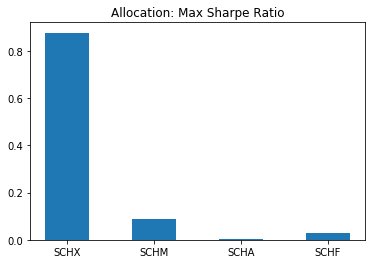

In [11]:
plt.figure()
plt.bar(x=np.arange(len(msr_array)),
        height=msr_array,
        width=0.5,
        align='center',
        tick_label=msr_alloc.index)
plt.title('Allocation: Max Sharpe Ratio')
plt.show()

Determine Global Minimum Volatility (GMV) portfolio allocation

In [12]:
gmv_index = np.argmin(results[0])
std_gmv = results[0, gmv_index]
print('GMV volatility: %0.4f' % std_gmv)
return_gmv = results[1, gmv_index]
print('GMV return: %0.4f' % return_gmv)
gmv_array = weights[gmv_index].round(4)
gmv_alloc = pd.DataFrame(gmv_array, index=stock_port, columns=['Allocation'])

GMV volatility: 0.1300
GMV return: 0.1011


Show bar graph of GMV portfolio allocation

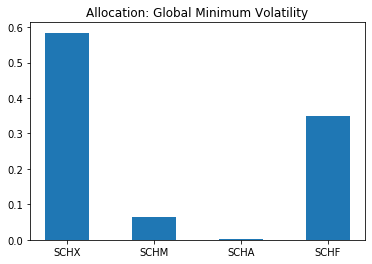

In [13]:
plt.figure()
plt.bar(x=np.arange(len(gmv_array)),
        height=gmv_array,
        width=0.5,
        align='center',
        tick_label=gmv_alloc.index)
plt.title('Allocation: Max Sharpe Ratio')
plt.title('Allocation: Global Minimum Volatility')
plt.show()

Plot efficient frontier and highlight Markowitz portfolios

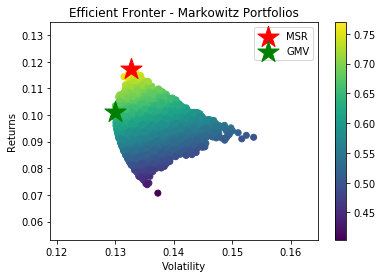

In [14]:
plt.figure()
plt.scatter(x=results[0, :],
            y=results[1, :],
            c=results[2, :])
plt.colorbar()
plt.scatter(x=std_sharpe,
            y=return_sharpe,
            marker='*',
            color='r',
            s=500,
            label='MSR')
plt.scatter(x=std_gmv,
            y=return_gmv,
            marker='*',
            color='g',
            s=500,
            label='GMV')
plt.legend()
plt.title('Efficient Fronter - Markowitz Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()